In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
connection = psycopg2.connect('user=postgres', password='123457',
                              host='127.0.0.1',port='5432', database='Analyzing eCommerce Business Performance with SQL')
cur = connection.cursor()

In [4]:
cur.execute('Select Version();')
record = cur.fetchone()
print('You are connected to - ',record)

You are connected to -  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


In [5]:
cur.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
for table in cur.fetchall(): # cur.fetchall berfungsi untuk menampilkan seluruh tabel pada database
    print(table)

('customers_dataset',)
('geolocation_dataset',)
('order_items_dataset',)
('order_payments_dataset',)
('order_reviews_dataset',)
('orders_dataset',)
('product_dataset',)
('sellers_dataset',)
('company_revenues',)
('cancel_peryear',)
('the_best_kategori',)
('the_bad_categori',)


In [6]:
cur = connection.cursor()
cur.execute("""SELECT tbk.Year, cr.com_revenue, cp.total_cancel_peryear, tbk.product_terbaik,tbk.revenue_top_product, tbc.kategori_produk, tbc.total_cancel FROM company_revenues cr FULL JOIN cancel_peryear cp ON cr.Year = cp.Year FULL JOIN the_best_kategori tbk ON cp.Year = tbk.Year FULL JOIN the_bad_categori tbc ON tbk.Year = tbc.Year; """)

hasil = cur.fetchall()

# Mendapatkan daftar nama kolom dari objek kursor
kolom = [desc[0] for desc in cur.description]

df= pd.DataFrame(hasil, columns=kolom)
df.head()


,year,com_revenue,total_cancel_peryear,product_terbaik,revenue_top_product,kategori_produk,total_cancel
0,2016,46653.74,15.0,furniture_decor,6899.35,toys,3.0
1,2017,6921535.24,247.0,bed_bath_table,569964.78,sports_leisure,25.0
2,2018,8451584.77,280.0,health_beauty,877065.73,health_beauty,27.0
3,2020,NaN,NaN,housewares,322.86,None,NaN


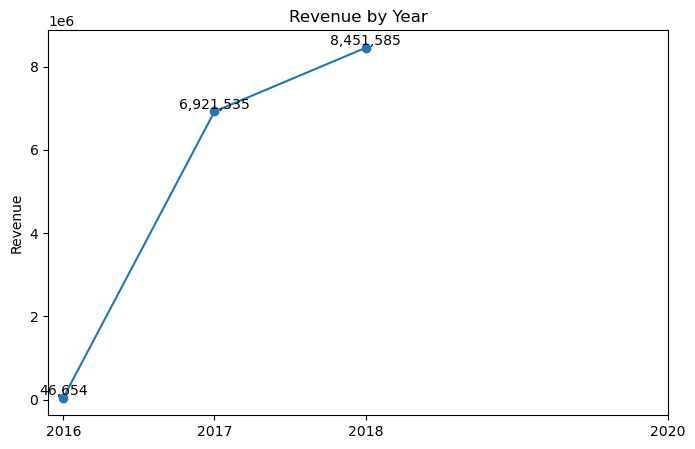

In [51]:

# Data
years = df['year']
revenue_peryear = df['com_revenue']

# Plotting 
plt.figure(figsize=(8,5))
plt.plot(years, revenue_peryear, marker='o')
plt.title('Revenue by Year')
plt.xticks(years)
plt.ylabel('Revenue')

for i in range(len(years)):
    revenue = revenue_peryear[i]
    if not np.isnan(revenue):
        plt.text(years[i], revenue,'{:,.0f}' .format(revenue_peryear[i]), ha='center', va='bottom')

# Menampilkan grafik
plt.show()

posx and posy should be finite values
posx and posy should be finite values


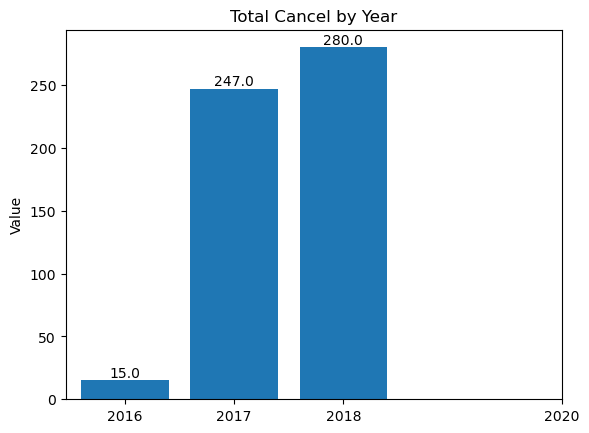

In [50]:
# data 
years = df['year']
values = df['total_cancel_peryear']

# plotting 
plt.bar(years, values)
plt.title('Total Cancel by Year')
plt.xticks(years)
plt.ylabel('Value')

# Menambahkan nilai di atas batang
for i in range(len(years)):
    plt.text(years[i],values[i], str(values[i]), ha='center', va='bottom')

plt.show()

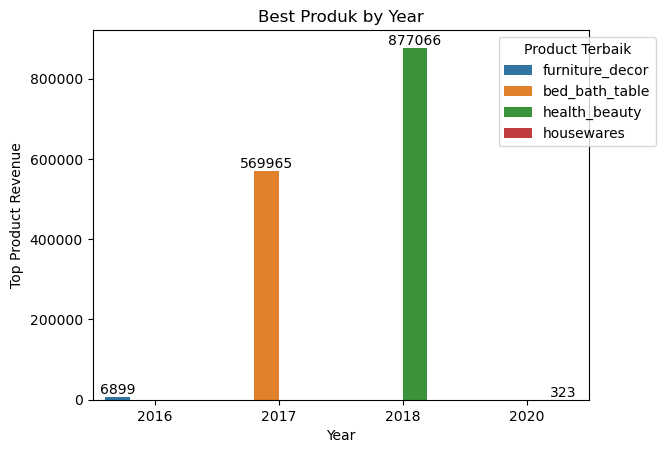

In [61]:
sortedd = df.sort_values('year')

ax = sns.barplot(data = sortedd, x ='year',y ='revenue_top_product', hue='product_terbaik')
plt.title('Best Produk by Year')
plt.xlabel('Year')
plt.ylabel('Top Product Revenue')
ax.legend(title='Product Terbaik', loc='upper right', bbox_to_anchor=(1.15, 1))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    

plt.show()

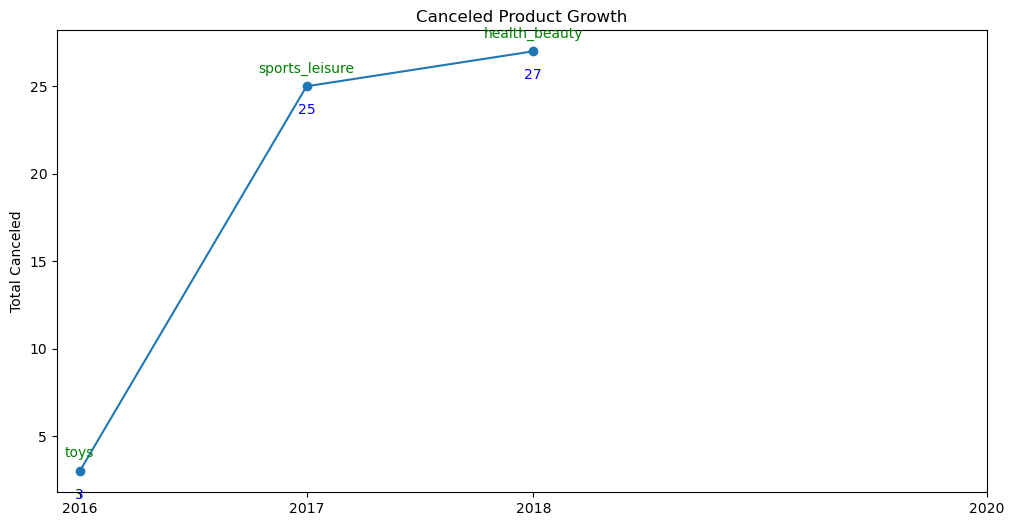

In [65]:

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['total_cancel'], marker='o')

# Menambahkan label di bawah titik pada kolom 'total_canceled_product' dengan warna biru
for i in range(len(df['year'])):
    plt.annotate('{:,.0f}'.format(df['total_cancel'][i]), 
                 xy=(df['year'][i], df['total_cancel'][i]), 
                 xytext=(0, -20), 
                 textcoords='offset points', 
                 ha='center',
                 color='blue')
# Menambahkan label di diatas titik pada kolom 'most_canceled_product' dengan warna hijau
for i in range(len(df['year'])):
    plt.annotate(df['kategori_produk'][i], 
                 xy=(df['year'][i], df['total_cancel'][i]), 
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center',
                 color='green')


# Menambahkan label pada sumbu x dan y
plt.xticks(df['year'])
plt.ylabel('Total Canceled')
plt.title('Canceled Product Growth')

plt.show()

## Kesimpulan

1. Terjadi peningkatan revenue perusahaan berturut - turut selama 3 tahun di mulai dari 2016-2018 dengan puncak tertinggi revenue perusahaan berada ditahun 2018 yaitu 845,158,477.
2. Namun walaupun puncak tertinggi revenue perusahaan ada ditahun 2018, jumlah kategori produk yang sering mengalami cancel juga terjadi ditahun yang sama dimana total tertingginya adalah 280.
3. Walau tingkat cancel produk cukup tinggi, namun perusahaan memiliki produk terbaik dengan revenue penjualan terbaik pada kategori health_beauty. Ini bisa jadi sinyal untuk terus mempertahankan, bahkan untuk terus ditingkatkan, tetapi setelah dilakukan analisa ternyata terlihat bahwa total produk yang dicancel paling tinggi berada pad kategori health_beuaty. Perlu ada analisa lebih lanjut apa penyebab customer melakukan pengcancelan produk khusus nya kategori Health beauty.